Calculate $\int_0^1 x^2 dx$

In [1]:
import scipy.integrate as integrate

def f(x): return x**2
# Calculates the integral of x^2 on the interval 0 to 1.
result, error = integrate.quad(f, 0, 1)
print(result)

0.3333333333333333


Calculate $\frac{d}{dx} [x^2 + 5x] dx$ at 20, evenly-spaced points between 0 and 10.

In [2]:
import numpy as np
from scipy.differentiate import derivative

def f(x): return x**2 + 5*x

num_intervals = 20
inputs = np.linspace(0, 10, num_intervals)
results = derivative(f, inputs)
rounded_results = results.df.round(decimals=3)

print(f"Results: {rounded_results}")
print(f"Error: {results.error}")

Results: [ 5.     6.053  7.105  8.158  9.211 10.263 11.316 12.368 13.421 14.474
 15.526 16.579 17.632 18.684 19.737 20.789 21.842 22.895 23.947 25.   ]
Error: [0.00000000e+00 7.10542736e-15 4.44089210e-15 3.55271368e-14
 8.88178420e-15 7.46069873e-14 2.30926389e-14 9.05941988e-14
 5.32907052e-15 1.59872116e-13 7.63833441e-14 2.13162821e-13
 1.49213975e-13 1.56319402e-13 1.10134124e-13 8.88178420e-14
 4.33431069e-13 4.86721774e-13 7.81597009e-14 2.77111667e-13]


Graph
$$
f(x) = \sin (x)
$$

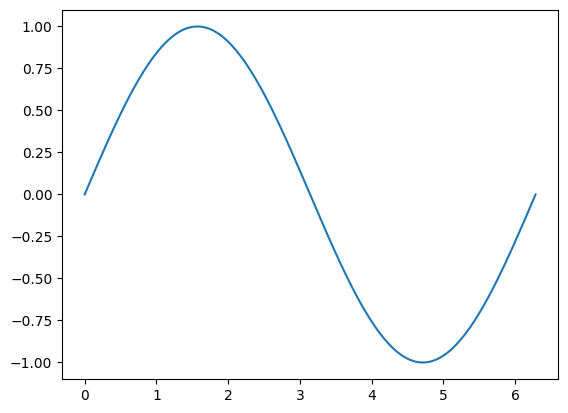

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Creates 200 evenly-spaced points between 0 and 2π.
x = np.linspace(0, 2 * np.pi, 200)
# Calculates the sin of each value in x.
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

The graphs of $f(x) = x^3 - 10x$ and $f'(x) = 3x^2 - 10$


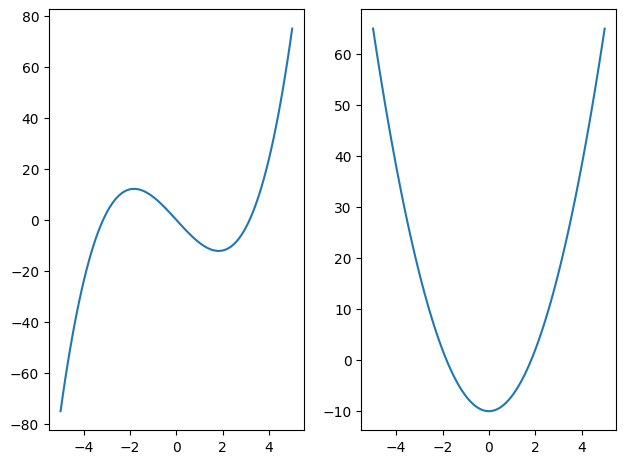

In [4]:
from scipy.differentiate import derivative
import matplotlib.pyplot as plt
import numpy as np

def f(x): return x**3 - 10*x

fig, (f_ax, df_ax) = plt.subplots(1, 2)
# Optimizes spacing between subplots.
fig.tight_layout()

# Generateds 100, evenly-spaced points between -5 and 5.
x_values = np.linspace(-5, 5, 100)

new_f = np.vectorize(f)
f_y_values = f(x_values)
f_ax.plot(x_values, f_y_values)

df_y_values = derivative(f, x_values).df
df_ax.plot(x_values, df_y_values)

In [5]:
import math
import numpy as np
from scipy.differentiate import derivative

def f(x): return math.sin(x)

nums = np.linspace(0, 2*np.pi, num=100)
vf = np.vectorize(f)
derivative(vf, nums).df

array([ 1.        ,  0.99798668,  0.99195481,  0.9819287 ,  0.9679487 ,
        0.95007112,  0.92836793,  0.90292654,  0.87384938,  0.84125353,
        0.80527026,  0.76604444,  0.72373404,  0.67850941,  0.63055267,
        0.58005691,  0.52722547,  0.47227107,  0.41541501,  0.35688622,
        0.29692038,  0.23575894,  0.17364818,  0.1108382 ,  0.04758192,
       -0.01586596, -0.07924996, -0.14231484, -0.20480667, -0.26647381,
       -0.32706796, -0.38634513, -0.44406661, -0.5       , -0.55392006,
       -0.60560969, -0.65486073, -0.70147489, -0.74526445, -0.78605309,
       -0.82367658, -0.85798341, -0.88883545, -0.91610846, -0.93969262,
       -0.95949297, -0.97542979, -0.98743889, -0.99547192, -0.99949654,
       -0.99949654, -0.99547192, -0.98743889, -0.97542979, -0.95949297,
       -0.93969262, -0.91610846, -0.88883545, -0.85798341, -0.82367658,
       -0.78605309, -0.74526445, -0.70147489, -0.65486073, -0.60560969,
       -0.55392006, -0.5       , -0.44406661, -0.38634513, -0.32

SciPy doesn't have a way to directly solve higher-order differntial equations. The solution is to convert these equations to a first-order vector differntial equation. 

For example, take the equations for relating position ($x$), velocity ($v$) and acceleration ($a$). 

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = a$$

These can be represented as a 2D vector.

$$\vec{y}(t) = \langle x, v\rangle$$

$$ \frac{d\vec{y}}{dt} = \left \langle \frac{dx}{dt}, \frac{dv}{dt} \right \rangle = \langle v, a\rangle $$

In [6]:
from scipy.integrate import solve_ivp

def f(t, y): return -0.5 * y
solutions = solve_ivp(f, [0, 10], [2, 4, 8])
print(solutions.t)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]


Compute the deviations.

In [7]:
import numpy as np

nums = np.array([[10, 12, 23, 23, 16, 23, 21, 16]])
standard_deviation = np.std(nums)
mean = np.mean(nums)
new_nums = [abs(n - mean) for n in nums]
print(f"stdev = {standard_deviation}")
print(new_nums)

stdev = 4.898979485566356
[array([8., 6., 5., 5., 2., 5., 3., 2.])]


Finding peaks of $\sin(x)$

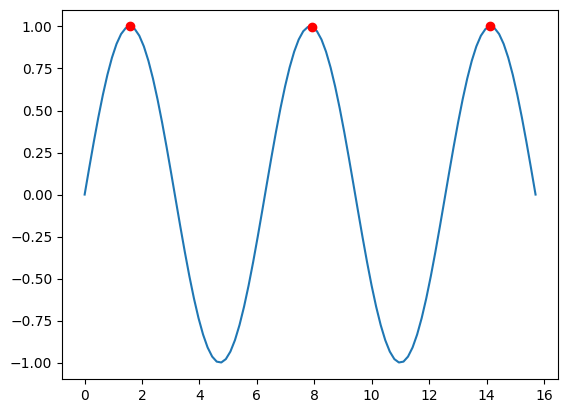

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pprint import pprint

fig, ax = plt.subplots()

def f(x): return np.sin(x)

x_values = np.linspace(0, 5*np.pi, num=100)
y_values = np.sin(x_values)

peaks, _ = find_peaks(y_values)

ax.plot(x_values, y_values)

for idx in peaks:
    ax.plot(x_values[idx], y_values[idx], marker='o', color='red')

plt.show()

In [9]:
import numpy as np
from scipy.signal import find_peaks

# Create a signal with some peaks
signal = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Find the peaks in the signal
peaks, _ = find_peaks(signal)

# Print the indices of the peaks
print(peaks)


[4]
